<a href="https://colab.research.google.com/github/harshachourey2/TripFare-Taxi-Fare-Prediction/blob/main/01_Data_Understanding__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
**Project Title: TripFare - Predicting Urban Taxi Fare with Machine Learning**"""

Notebook 1 Objective:
- Load taxi dataset
- Understand data structure
- Handle missing values & duplicates
- Perform Exploratory Data Analysis (EDA)
- Save cleaned data for next notebook

##Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


##Load Dataset

In [2]:
df = pd.read_csv("taxi_fare.csv")


In [3]:
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [4]:
df.tail()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.0,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.0,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.0,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80
212344,1,2016-03-01 12:15:38,2016-03-01 12:34:59,1,-73.988770,40.712662,1,N,-73.944550,40.782276,2,20.5,0.0,0.5,0.00,0.0,0.3,21.30


In [5]:
print("Rows & Columns:", df.shape)


Rows & Columns: (212345, 18)


In [6]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [7]:
df.isnull().sum()


,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [8]:
df.duplicated().sum()


np.int64(0)

In [9]:
df = df.drop_duplicates()


In [10]:
"total_amount" in df.columns


True

In [11]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


##Basic Feature Engineering

In [12]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


In [13]:
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()


In [14]:
df['is_weekend'] = df['pickup_day'].isin(['Saturday', 'Sunday']).astype(int)


In [15]:
df['is_night'] = df['pickup_hour'].apply(lambda x: 1 if x >= 22 or x <= 5 else 0)


#📊 EXPLORATORY DATA ANALYSIS (EDA)

##Distribution of Total Fare

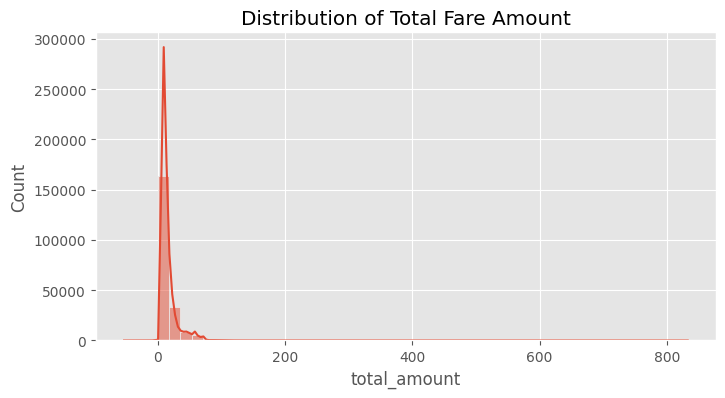

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title("Distribution of Total Fare Amount")
plt.show()


##Passenger Count vs Fare

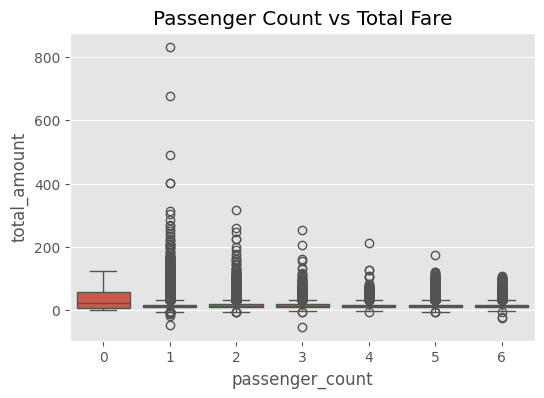

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='passenger_count', y='total_amount', data=df)
plt.title("Passenger Count vs Total Fare")
plt.show()


##Pickup Hour vs Fare

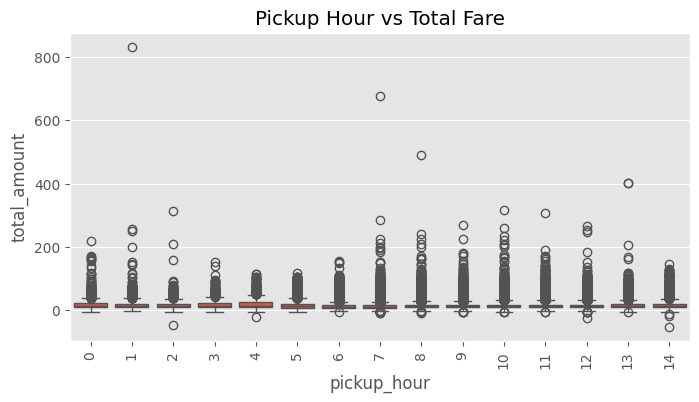

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(x='pickup_hour', y='total_amount', data=df)
plt.xticks(rotation=90)
plt.title("Pickup Hour vs Total Fare")
plt.show()


##Weekday vs Weekend Fare

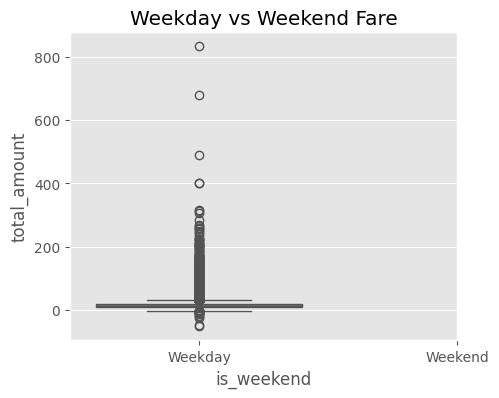

In [19]:
plt.figure(figsize=(5,4))
sns.boxplot(x='is_weekend', y='total_amount', data=df)
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title("Weekday vs Weekend Fare")
plt.show()


##Night Ride Impact

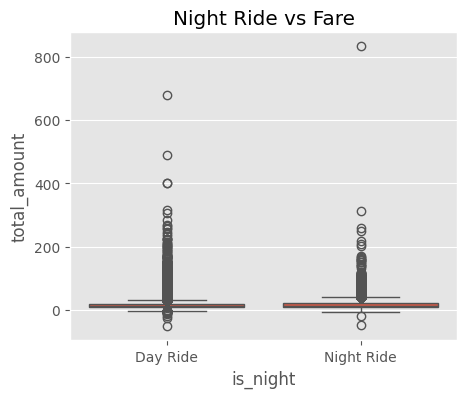

In [20]:
plt.figure(figsize=(5,4))
sns.boxplot(x='is_night', y='total_amount', data=df)
plt.xticks([0,1], ['Day Ride', 'Night Ride'])
plt.title("Night Ride vs Fare")
plt.show()


##Outlier Detection (Total Fare)

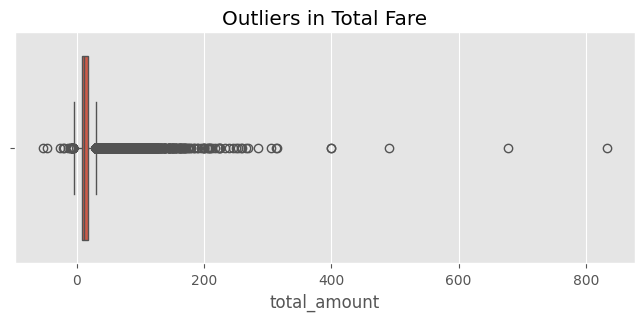

In [21]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['total_amount'])
plt.title("Outliers in Total Fare")
plt.show()


In [22]:
df = df[df['total_amount'] > 0]
df = df[df['total_amount'] < df['total_amount'].quantile(0.99)]


In [23]:
df.shape


(209974, 22)

In [24]:
df.to_csv("clean_taxi_data.csv", index=False)
